The data from Maven here is from 01/01/2015 to 03/01/2015, at the beginning of the mission. This was the first attempt at filtering the data, without using the quality data from the SPDF website.

In [20]:
import numpy as np
import pandas as pd
import datetime
posFrame = pd.read_csv('csv files/MavenPosition2.csv')
windFrame = pd.read_csv('csv files/MavenSolarWind2.csv')
windFrame = windFrame.loc[:, ~windFrame.columns.str.contains('^Unnamed')]
posFrame = posFrame.loc[:, ~posFrame.columns.str.contains('^Unnamed')]
windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
windFrame['date'] = pd.to_datetime(windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ']).dt.date
posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])
posFrame['date'] = pd.to_datetime(posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ']).dt.date
mergedFrame = pd.merge(windFrame, posFrame, on='date')
mergedFrame = mergedFrame.drop(['date', 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], axis=1)
mergedFrame = mergedFrame[mergedFrame.IonDensityN_CC != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityXKM_S != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityYKM_S != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityZKM_S != -1.0E+31]
mergedFrame.to_csv(r'csv files/MavenMerged2.csv')
mergedFrame.describe()

,IonDensityN_CC,IonVelocityXKM_S,IonVelocityYKM_S,IonVelocityZKM_S,MarsGeoXKM,MarsGeoYKM,MarsGeoZKM,RAD_AU_AU,HGI_LAT_deg,HGI_LON_deg
count,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000,690293.000000
mean,5.174614,-231.132045,16.522152,-11.982489,-8.872998,-1.470097,-3162.054790,1.399833,5.401612,290.969374
std,7.381073,151.225621,36.173599,36.193611,3590.365336,3593.128114,4386.204445,0.011717,0.230355,10.586002
min,0.000000,-821.000000,-458.000000,-527.000000,-8900.000000,-8700.000000,-9330.000000,1.380000,4.900000,272.800000
25%,1.450000,-343.000000,-2.600000,-27.900000,-2530.000000,-2530.000000,-7360.000000,1.390000,5.200000,281.600000
50%,3.450000,-276.000000,17.100000,-7.020000,2.410000,-15.700000,-3930.000000,1.400000,5.500000,291.100000
75%,6.640000,-91.400000,35.600000,10.100000,2520.000000,2530.000000,1230.000000,1.410000,5.600000,300.300000
max,807.000000,738.000000,1200.000000,585.000000,8790.000000,8860.000000,4220.000000,1.420000,5.600000,308.800000


<Figure size 432x288 with 0 Axes>

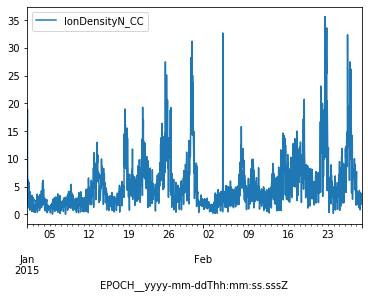

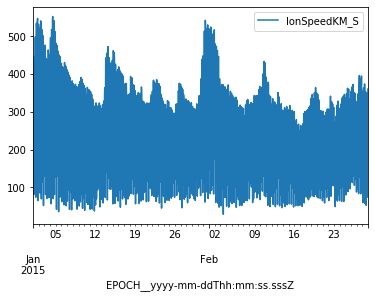

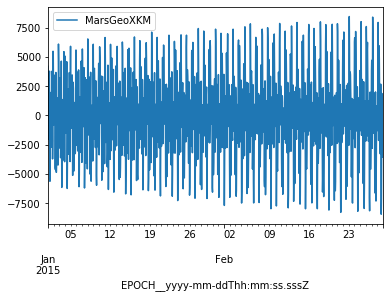

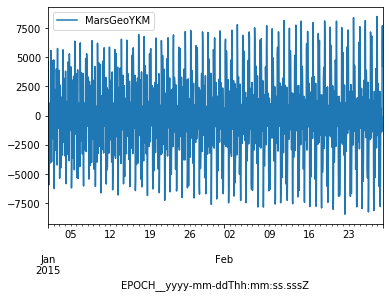

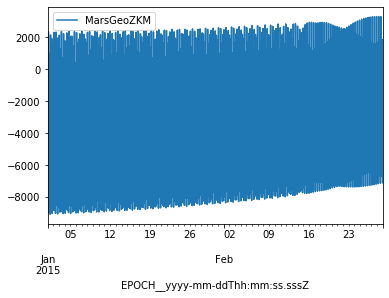

In [38]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Maven velocity and position data")

df = pd.read_csv('csv files/MavenMerged2.csv')
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df['IonSpeedKM_S'] = np.linalg.norm(df[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)

df = df.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonDensityN_CC')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoXKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoYKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoZKM')

plt.show()

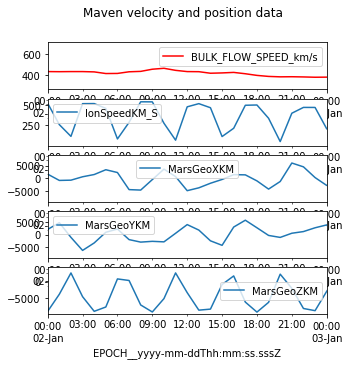

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]

fig, axes = plt.subplots(nrows = 5, ncols=1)
fig.suptitle("Maven velocity and position data")

df = pd.read_csv('csv files/MavenMerged2.csv')
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
df['IonSpeedKM_S'] = np.linalg.norm(df[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)

df = df.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df2 = pd.read_csv('csv files/Omni4Maven2.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
df2 = df2[df2['ION_DENSITY_N/cm3'] != -1.0E+31]
df2 = df2.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

#ax = plt.gca()
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S', ax=axes[1])
df2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='BULK_FLOW_SPEED_km/s',color='red', ax=axes[0])

df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoXKM', ax=axes[2])
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoYKM', ax=axes[3])
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoZKM', ax=axes[4])
#df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonDensityN_CC', color='red', ax=ay)
#df2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='ION_DENSITY_N/cm3',  ax=ay)
for ax in axes:
    ax.set_xlim([datetime.date(2015, 1, 2), datetime.date(2015, 1, 3)])

plt.show()

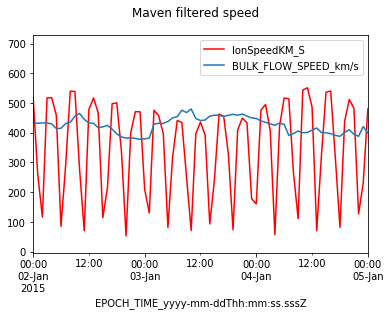

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Maven filtered speed")


df = pd.read_csv('csv files/MavenMerged2.csv')
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
#df = df[df['MarsGeoXKM'] >= -0]
#df = df[df['MarsGeoYKM'] >= 0]
#df = df[df['MarsGeoZKM'] >= 0]
df['IonSpeedKM_S'] = np.linalg.norm(df[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)
df = df.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df1 = pd.read_csv('csv files/Omni4Maven2.csv')
df1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

#df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S')

ax = plt.gca()
ay = plt.gca()
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S', color='red', ax=ax)
df1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='BULK_FLOW_SPEED_km/s', ax=ax)

ax.set_xlim([datetime.date(2015, 1, 2), datetime.date(2015, 1, 5)])

plt.show()